# MID TERM (KNN from sklearn) 

### PreProcessing on Breast Cancer Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix


In [2]:
#comment out the below code and uncomment the comment for read when running on local system. Please make sure that the dataset is in the same directory
data = pd.read_csv("drive/My Drive/EXTRA/data.csv")
#data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Drop the id and unnamed columns
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
# Encode the diagnosis column (M=1, B=0)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})



In [4]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Split the data into features and target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']


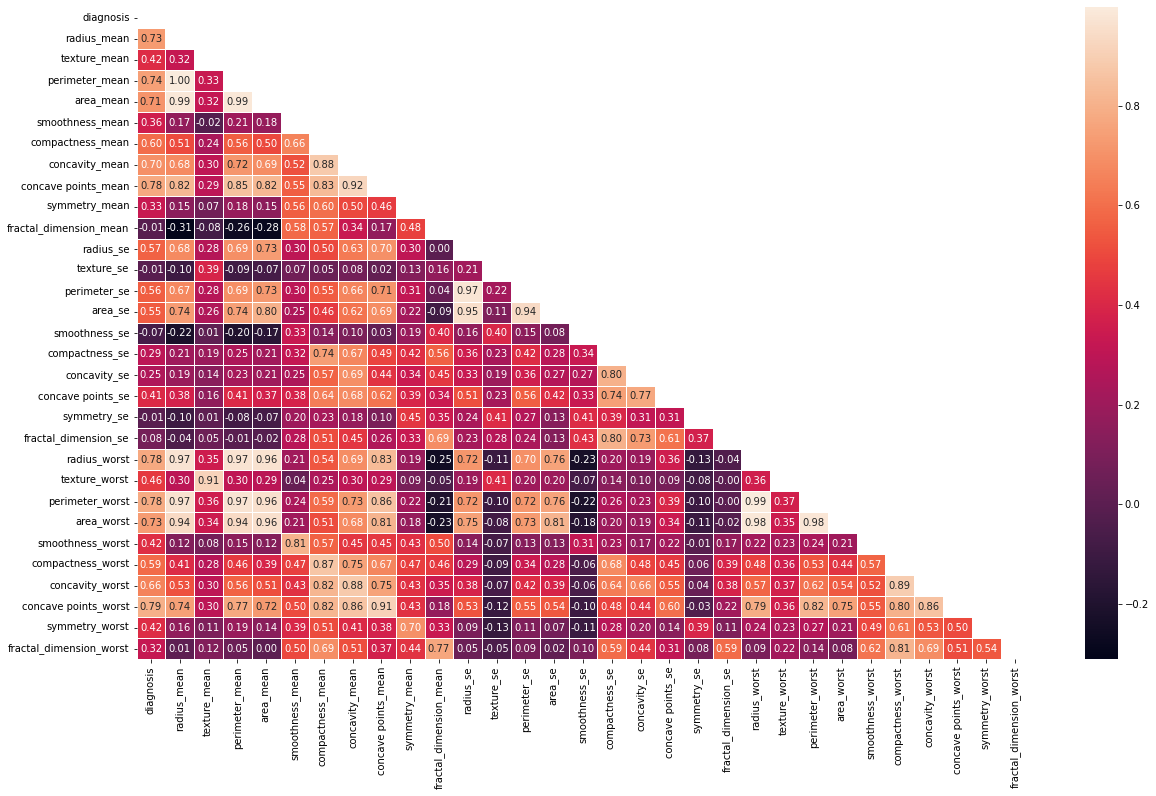

In [6]:
# heatmap 

plt.figure(figsize = (20, 12))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()


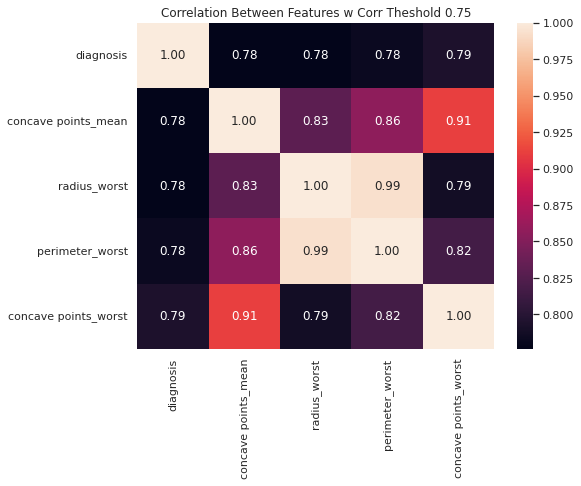

In [7]:
threshold = 0.75 
filtre = np.abs(corr["diagnosis"]) > threshold 
corr_features = corr.columns[filtre].tolist()

# Set figure size and font scale
plt.figure(figsize=(8,6))
sns.set(font_scale=1)

sns.heatmap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.75")
plt.show()



### Sklearn KNN

In [8]:
# Split the data into training and testing sets
X_features = X[["concave points_mean", "radius_worst", "perimeter_worst", "concave points_worst"]]
#X_features.head()
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=2)

In [9]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
# Implement KNN with Euclidean distance
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(X_train, y_train)
# Predict the classes of the test set
y_pred_euclidean = knn.predict(X_test)
acc_euclidean = accuracy_score(y_test, y_pred_euclidean)
y_pred = knn.predict(X_test)


In [11]:
acc_euclidean

0.9210526315789473

#### Crossvalidation scores

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
# Define the F1 score as the evaluation metric
f1_scorer = make_scorer(f1_score, average='macro')

cross_scores_euclidean = cross_val_score(knn, X, y, cv=10, scoring=f1_scorer)
print("Accuracy scores:", acc_euclidean)
# Print the cross-validation scores
print("Cross-validation scores:", cross_scores_euclidean)
print("Average accuracy:", cross_scores_euclidean.mean())
print("Average Standard Deviation:", cross_scores_euclidean.std())



Accuracy scores: 0.9210526315789473
Cross-validation scores: [0.86358974 0.81993682 0.90477781 0.96148649 0.94153846 0.92460317
 0.96230159 0.92297297 0.90821256 0.94228787]
Average accuracy: 0.9151707495300118
Average Standard Deviation: 0.04222965113717176


In [13]:
# Implement KNN with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=10, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
acc_manhattan = accuracy_score(y_test, y_pred_manhattan)

In [14]:
acc_manhattan

0.9298245614035088

In [15]:
cross_scores_manhattan = cross_val_score(knn_manhattan, X, y, cv=10, scoring=f1_scorer)
print("Accuracy scores:", acc_manhattan)
# Print the cross-validation scores
print("Cross-validation scores:", cross_scores_manhattan)
print("Average accuracy:", cross_scores_manhattan.mean())
print("Average Standard Deviation:", cross_scores_manhattan.std())






Accuracy scores: 0.9298245614035088
Cross-validation scores: [0.86358974 0.81993682 0.88445946 0.96148649 0.96148649 0.94286669
 0.98095556 0.94153846 0.92597403 0.98076262]
Average accuracy: 0.9263056359920286
Average Standard Deviation: 0.05092415016131433


###Testing the accuracy vs neighbours value




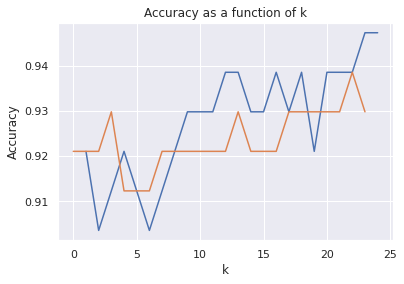

In [16]:
from sklearn.model_selection import cross_val_score
accuracy_scores_eucledian = []
accuracy_scores_manhattan = []

k_values = []
for n in range(1, 25): # Implement KNN with Euclidean distance
  knn = KNeighborsClassifier(n_neighbors=n, metric='euclidean')
  knn_manhattan = KNeighborsClassifier(n_neighbors=n, metric='manhattan')

  knn.fit(X_train, y_train)
  y_pred_euclidean = knn.predict(X_test)
  acc_euclidean = accuracy_score(y_test, y_pred_euclidean)
  accuracy_scores_eucledian.append(acc_euclidean)

  knn_manhattan.fit(X_train, y_train)
  y_pred_manhattan = knn_manhattan.predict(X_test)
  acc_manhattan = accuracy_score(y_test, y_pred_manhattan)
  accuracy_scores_manhattan.append(acc_manhattan)
  k_values.append(n)

plt.plot(k_values, accuracy_scores_manhattan, accuracy_scores_eucledian)
plt.title('Accuracy as a function of k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()


In [17]:
from sklearn.model_selection import cross_val_score
f1_scores_mean_manhattan = []
f1_scores_std_manhattan = []
f1_scores_mean_euclidean = []
f1_scores_std_euclidean = []
k_values = []
for n in range(1, 21): # Implement KNN with Euclidean distance
  knn_euclidean = KNeighborsClassifier(n_neighbors=n, metric='euclidean')
  f1_scores_euclidean = cross_val_score(knn_euclidean, X, y, cv=10, scoring='f1')
  f1_scores_mean_euclidean.append(np.mean(f1_scores_euclidean))
  f1_scores_std_euclidean.append(np.std(f1_scores_euclidean))

  knn_manhattan = KNeighborsClassifier(n_neighbors=n, metric='manhattan')
  f1_scores_manhattan = cross_val_score(knn_manhattan, X, y, cv=10, scoring='f1')
  f1_scores_mean_manhattan.append(np.mean(f1_scores_manhattan))
  f1_scores_std_manhattan.append(np.std(f1_scores_manhattan))
  




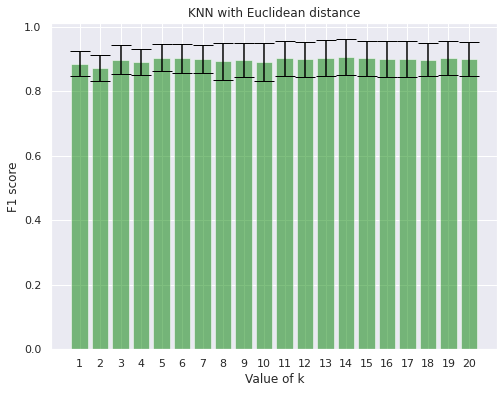

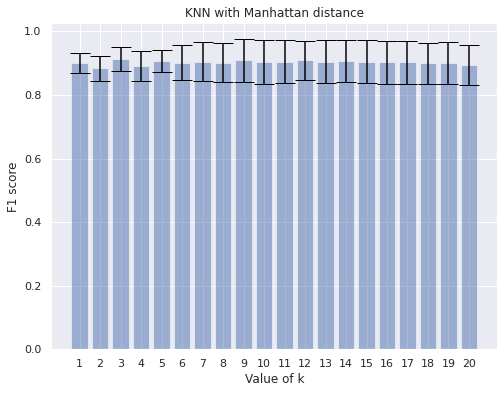

In [18]:
k_range = range(1, 21)
# Plot a bar chart with error bars for each k value - Euclidean distance
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(k_range, f1_scores_mean_euclidean, yerr=f1_scores_std_euclidean, align='center', alpha=0.5, ecolor='black', capsize=10, color = 'green')
ax.set_xticks(k_range)
ax.set_xlabel('Value of k')
ax.set_ylabel('F1 score')
ax.set_title('KNN with Euclidean distance')
plt.show()

# Plot a bar chart with error bars for each k value - Manhattan distance
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(k_range, f1_scores_mean_manhattan, yerr=f1_scores_std_manhattan, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xticks(k_range)
ax.set_xlabel('Value of k')
ax.set_ylabel('F1 score')
ax.set_title('KNN with Manhattan distance')
plt.show()


In [19]:
# classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        69
           1       0.89      0.91      0.90        45

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



### SVD on sklearn KNN


In [20]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
train_test_split(X, y, test_size=0.2, random_state=2)


[     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 560        14.05         27.15           91.38      600.4          0.09929   
 428        11.13         16.62           70.47      381.1          0.08151   
 198        19.18         22.49          127.50     1148.0          0.08523   
 203        13.81         23.75           91.56      597.8          0.13230   
 41         10.95         21.35           71.90      371.1          0.12270   
 ..           ...           ...             ...        ...              ...   
 299        10.51         23.09           66.85      334.2          0.10150   
 534        10.96         17.62           70.79      365.6          0.09687   
 493        12.46         12.83           78.83      477.3          0.07372   
 527        12.34         12.27           78.94      468.5          0.09003   
 168        17.47         24.68          116.10      984.6          0.10490   
 
      compactness_mean  concavity_mean  concave po

#### Elbow point and Low and high value


The elbow point method can help in determining the low and high values for SVD by identifying an optimal number of components that capture the most significant variance in the data. By plotting the cumulative explained variance against the number of components, we can look for an "elbow" point, which is the point where adding more components does not provide significant additional explained variance.

In our case, the low value for SVD can be chosen at the elbow point, representing a balance between dimensionality reduction and information preservation. The high value for SVD can be chosen by selecting a higher number of components, which retains more information from the original data, but results in less dimensionality reduction.



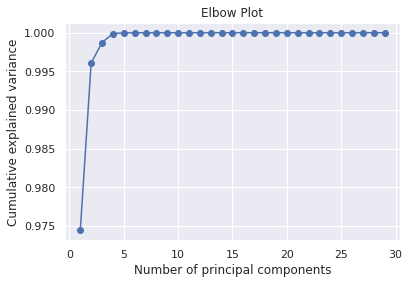

In [21]:
from sklearn.decomposition import TruncatedSVD

# Fit truncated SVD to the data
svd = TruncatedSVD(n_components=29)
X_svd = svd.fit_transform(X)

# Compute explained variance ratios
explained_variances = svd.explained_variance_ratio_

# Compute cumulative sum of explained variance ratios
cumulative_variances = np.cumsum(explained_variances)

# Plot the cumulative sum
plt.plot(range(1, len(cumulative_variances) + 1), cumulative_variances, 'bo-')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.title('Elbow Plot')
plt.show()

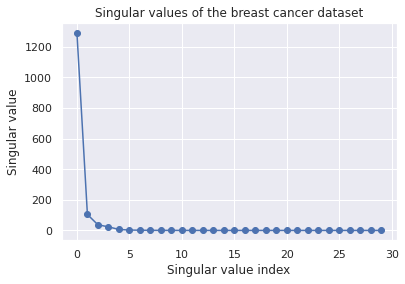

[1.29177052e+03 1.04077193e+02 3.69434045e+01 2.32924557e+01
 6.42570354e+00 2.40384687e+00 1.35335819e+00 6.10473058e-01
 4.12572744e-01 2.96653176e-01 1.85685060e-01 9.25476077e-02
 5.91274943e-02 4.90602803e-02 3.64244251e-02 2.59574728e-02
 1.99205632e-02 1.93613401e-02 1.37634666e-02 1.29025134e-02
 8.84199300e-03 8.46439439e-03 5.91167352e-03 5.33414652e-03
 4.13719112e-03 3.53544074e-03 2.36948597e-03 1.86562383e-03
 1.41597253e-03 8.69666953e-04]


In [22]:

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Compute the SVD of the data
U, s, VT = np.linalg.svd(X, full_matrices=False)

# Compute the singular values
singular_values = s / np.sqrt(len(X) - 1)

# Plot the singular values
plt.plot(range(len(singular_values)), singular_values, 'o-')
plt.xlabel('Singular value index')
plt.ylabel('Singular value')
plt.title('Singular values of the breast cancer dataset')
plt.show()
print(singular_values)

#### Here I saw that the low value(were there is a steep decrease in singular value) is at n = 1 and high value (were the singluar value becomes constant) is 5.

In [23]:
# Perform SVD with low-rank approximation for a "low" value of approximation rank
svd_low = TruncatedSVD(n_components=1)
X_train_low = svd_low.fit_transform(X_train)
X_test_low = svd_low.transform(X_test)

# Perform SVD with low-rank approximation for a "high" value of approximation rank
svd_high = TruncatedSVD(n_components=5)
X_train_high = svd_high.fit_transform(X_train)
X_test_high = svd_high.transform(X_test)

# Train k-NN classifiers on the low-rank and high-rank representations
knn_low = KNeighborsClassifier(n_neighbors=5)
knn_low.fit(X_train_low, y_train)

knn_high = KNeighborsClassifier(n_neighbors=5)
knn_high.fit(X_train_high, y_train)

# Train k-NN classifiers on the low-rank and high-rank representations
knn_low = KNeighborsClassifier(n_neighbors=5)
f1_scores_low = cross_val_score(knn_low, X_train_low, y_train, cv=5, scoring='f1')

knn_high = KNeighborsClassifier(n_neighbors=5)
f1_scores_high = cross_val_score(knn_high, X_train_high, y_train, cv=5, scoring='f1')

# Compute the mean F1 score for each representation
mean_f1_low = f1_scores_low.mean()
mean_f1_high = f1_scores_high.mean()

std_f1_low = f1_scores_low.std()
std_f1_high = f1_scores_high.std()
print("Mean F1 score for low-rank representation:", round(mean_f1_low, 3))
print("Mean F1 score for high-rank representation:", round(mean_f1_high, 3))
print("Std F1 score for low-rank representation:", round(std_f1_low, 3))
print("Std F1 score for high-rank representation:", round(std_f1_high, 3))



Mean F1 score for low-rank representation: 0.858
Mean F1 score for high-rank representation: 0.901
Std F1 score for low-rank representation: 0.019
Std F1 score for high-rank representation: 0.029


In [24]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
knn_low = KNeighborsClassifier(n_neighbors=5)
knn_low.fit(X_train_low, y_train)

knn_high = KNeighborsClassifier(n_neighbors=5)
knn_high.fit(X_train_high, y_train)

# Evaluate the k-NN classifiers on the test data
y_pred_low = knn_low.predict(X_test_low)
y_pred_prob_low = knn_low.predict_proba(X_test_low)

y_pred_high = knn_high.predict(X_test_high)
y_pred_prob_high = knn_high.predict_proba(X_test_high)

# Calculate precision, recall, and accuracy for low-rank representation
y_pred_low = knn_low.predict(X_test_low)
precision_low = precision_score(y_test, y_pred_low)
recall_low = recall_score(y_test, y_pred_low)
accuracy_low = accuracy_score(y_test, y_pred_low)

# Calculate precision, recall, and accuracy for high-rank representation
y_pred_high = knn_high.predict(X_test_high)
precision_high = precision_score(y_test, y_pred_high)
recall_high = recall_score(y_test, y_pred_high)
accuracy_high = accuracy_score(y_test, y_pred_high)


print("Precision for low-rank approximation:", round(precision_low, 3))
print("Recall for low-rank approximation:", round(recall_low, 3))
print("Accuracy for low-rank approximation:", round(accuracy_low, 3))

print("Precision for high-rank approximation:", round(precision_high, 3))
print("Recall for high-rank approximation:", round(recall_high, 3))
print("Accuracy for high-rank approximation:", round(accuracy_high, 3))


Precision for low-rank approximation: 0.86
Recall for low-rank approximation: 0.822
Accuracy for low-rank approximation: 0.877
Precision for high-rank approximation: 0.889
Recall for high-rank approximation: 0.889
Accuracy for high-rank approximation: 0.912


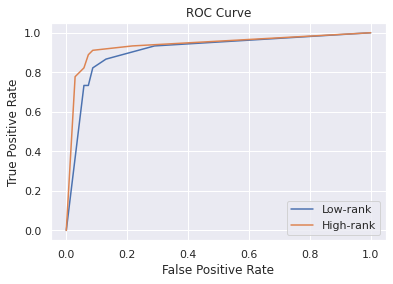

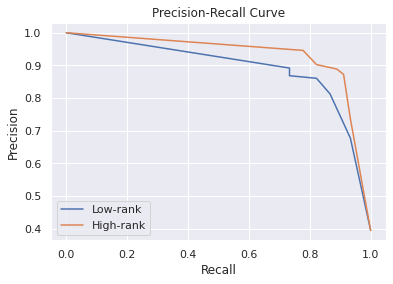

In [25]:
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# Calculate false positive rate, true positive rate, and thresholds for low-rank representation
y_pred_prob_low = knn_low.predict_proba(X_test_low)[:, 1]
fpr_low, tpr_low, thresholds_low = roc_curve(y_test, y_pred_prob_low)
precision_low, recall_low, thresholds_low = precision_recall_curve(y_test, y_pred_prob_low)

# Calculate false positive rate, true positive rate, and thresholds for high-rank representation
y_pred_prob_high = knn_high.predict_proba(X_test_high)[:, 1]
fpr_high, tpr_high, thresholds_high = roc_curve(y_test, y_pred_prob_high)
precision_high, recall_high, thresholds_high = precision_recall_curve(y_test, y_pred_prob_high)

# Plot the ROC curve and precision-recall curve for low-rank and high-rank representations
plt.plot(fpr_low, tpr_low, label="Low-rank")
plt.plot(fpr_high, tpr_high, label="High-rank")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

plt.plot(recall_low, precision_low, label="Low-rank")
plt.plot(recall_high, precision_high, label="High-rank")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


###MLP on sklearn KNN

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf


def create_autoencoder(input_dim, bottleneck_ratio):
    model = Sequential()
    model.add(Dense(15, input_dim=input_dim, activation='relu'))
    model.add(Dense(int(bottleneck_ratio * input_dim), activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(input_dim, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Define the MLP-based autoencoders with different bottleneck sizes
model1 = create_autoencoder(X_train.shape[1], bottleneck_ratio=0.05)
model2 = create_autoencoder(X_train.shape[1], bottleneck_ratio=0.2)

# Train the autoencoders
for model in [model1, model2]:
    model.fit(X_train, X_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Use the trained autoencoders to transform the training and test data
X_train_ae1, X_test_ae1 = model1.predict(X_train), model1.predict(X_test)
X_train_ae2, X_test_ae2 = model2.predict(X_train), model2.predict(X_test)


4/4 [==============================] - 0s 3ms/step


In the create_autoencoder function, I define an autoencoder neural network using Keras. The function takes input_dim (input data dimension) and bottleneck_ratio (for bottleneck layer size). I build the network using a Sequential model, adding a hidden layer with 15 neurons, a bottleneck layer, and two more layers for decoding. The final layer reconstructs the output to mathc the input data. I compile the model using mean squared error loss and the Adam optimizer. The functoin returns the autoencoder model.


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

# Train k-NN classifiers on the autoencoder-based representations with 5% and 20% bottleneck sizes
knn_ae1 = KNeighborsClassifier(n_neighbors=5)
knn_ae1.fit(X_train_ae1, y_train)

knn_ae2 = KNeighborsClassifier(n_neighbors=5)
knn_ae2.fit(X_train_ae2, y_train)

# Perform 5-fold cross-validation with the k-NN classifier on the autoencoder representation with 5% bottleneck size
scores_ae1 = cross_val_score(knn_ae1, X_train_ae1, y_train, cv=5, scoring='f1')
mean_score_ae1 = np.mean(scores_ae1)
std_score_ae1 = np.std(scores_ae1)
print("Cross-validation scores for KNN with 5% bottleneck size:")
print(scores_ae1)
print("Mean score:", round(mean_score_ae1, 3))
print("Standard deviation:", round(std_score_ae1,3))

# Perform 5-fold cross-validation with the k-NN classifier on the autoencoder representation with 20% bottleneck size
scores_ae2 = cross_val_score(knn_ae2, X_train_ae2, y_train, cv=5, scoring='f1')
mean_score_ae2 = np.mean(scores_ae2)
std_score_ae2 = np.std(scores_ae2)
print("Cross-validation scores for KNN with 20% bottleneck size:")
print(scores_ae2)
print("Mean score:", round(mean_score_ae2,3))
print("Standard deviation:", round(std_score_ae2,3))


Cross-validation scores for KNN with 5% bottleneck size:
[0.         0.53225806 0.53225806 0.544      0.544     ]
Mean score: 0.431
Standard deviation: 0.215
Cross-validation scores for KNN with 20% bottleneck size:
[0.86666667 0.89230769 0.85714286 0.86567164 0.875     ]
Mean score: 0.871
Standard deviation: 0.012


### Comparison of SVD and Autoencoder

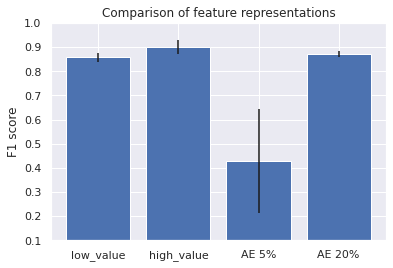

In [28]:
plt.bar(['low_value', 'high_value','AE 5%', 'AE 20%'], [mean_f1_low,mean_f1_high,mean_score_ae1, mean_score_ae2], yerr=[std_f1_low, std_f1_high,std_score_ae1, std_score_ae2])
plt.ylim(0.1, 1)
plt.ylabel('F1 score')
plt.title('Comparison of feature representations')
plt.show()



#FINAL TERM (KNN from scratch)

### KNN 

In [29]:
import numpy as np

class KNN:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k  # Number of nearest neighbors to consider
        self.distance_metric = distance_metric  # Distance metric to use ('euclidean' or 'manhattan')
        
    def fit(self, X, y):
        self.X_train = X  # Store training data
        self.y_train = y  # Store training labels
        
    def predict(self, X):
        y_pred = []  # Initialize the list of predictions
        
        # Iterate over each sample in the input data
        for sample in X:
            # Calculate distances based on the chosen distance metric
            if self.distance_metric == 'euclidean':
                distances = [self.euclidean_distance(sample, x) for x in self.X_train]
            elif self.distance_metric == 'manhattan':
                distances = [self.manhattan_distance(sample, x) for x in self.X_train]
            else:
                raise ValueError('Distance metric not supported.')
                
            # Find the indices of the k nearest neighbors
            k_nearest_indices = np.argsort(distances)[:self.k]
            # Get the labels of the k nearest neighbors
            k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]
            # Determine the most common label among the neighbors
            most_common_label = max(set(k_nearest_labels), key=k_nearest_labels.count)
            y_pred.append(most_common_label)  # Add the most common label to the predictions list
            
        return np.array(y_pred)  # Return the predictions as a NumPy array
    
    def euclidean_distance(self, x1, x2):
        # Calculate the Euclidean distance between two points
        distance = np.sqrt(np.sum((x1 - x2)**2))
        return distance
    
    def manhattan_distance(self, x1, x2):
        # Calculate the Manhattan distance between two points
        distance = np.sum(np.abs(x1 - x2))
        return distance
    
    def score(self, X, y):
        # Calculate the accuracy of the model's predictions
        y_pred = self.predict(X)
        return np.mean(y_pred == y)
        
    def get_params(self, deep=True):
        # Return the model's parameters (used for compatibility with some scikit-learn functions)
        return {'k': self.k, 'distance_metric': self.distance_metric}


In [30]:

data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [31]:
# Split the data into training and testing sets
X_features = X[["concave points_mean", "radius_worst", "perimeter_worst", "concave points_worst"]]
#X_features.head()
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2)

In [32]:

# Convert the DataFrame to a NumPy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

### Cross validation scores of KNN with euclidean and manhattan

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score

def knn_evaluation(X_train, y_train, distance_metric):
    clf = KNN(k=5, distance_metric=distance_metric)

    metrics = ['accuracy', 'precision', 'recall', 'f1']
    mean_scores = {}
    std_scores = {}

    for metric in metrics:
        scores = cross_val_score(clf, X_train, y_train, cv=5, scoring=metric)
        mean_scores[metric] = scores.mean()
        std_scores[metric] = scores.std()

    print(f"Results for KNN using {distance_metric} distance:")
    for metric in metrics:
        mean_score = mean_scores[metric]
        std_score = std_scores[metric]
        print(f"{metric.capitalize()}: {round(mean_score, 3)} ± {round(std_score, 3)}")
    print()

knn_evaluation(X_train, y_train, distance_metric='euclidean')
knn_evaluation(X_train, y_train, distance_metric='manhattan')


Results for KNN using euclidean distance:
Accuracy: 0.914 ± 0.027
Precision: 0.91 ± 0.074
Recall: 0.851 ± 0.09
F1: 0.874 ± 0.048

Results for KNN using manhattan distance:
Accuracy: 0.919 ± 0.029
Precision: 0.921 ± 0.072
Recall: 0.851 ± 0.09
F1: 0.88 ± 0.05



### SVD ON SELF IMPLEMENTED KNN

In [34]:
# Split the data into training and testing sets
X_features = X[["concave points_mean", "radius_worst", "perimeter_worst", "concave points_worst"]]
#X_features.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:

# Convert the DataFrame to a NumPy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [36]:
# Function to evaluate KNN with TruncatedSVD for dimensionality reduction
def svd_knn_evaluation(n_components, X_train, y_train, label, distance_metric='euclidean'):
    # Perform dimensionality reduction using TruncatedSVD
    svd = TruncatedSVD(n_components=n_components)
    X_train_svd = svd.fit_transform(X_train)

    # Create a KNN classifier with the specified distance metric
    knn_svd = KNN(k=5, distance_metric=distance_metric)
    knn_svd.fit(X_train_svd, y_train)

    # Define the evaluation metrics
    metrics = ['f1', 'accuracy', 'precision', 'recall']
    mean_scores = {}
    std_scores = {}

    # Calculate the cross-validation scores for each metric
    for metric in metrics:
        scores = cross_val_score(knn_svd, X_train_svd, y_train, cv=5, scoring=metric)
        mean_scores[metric] = scores.mean()
        std_scores[metric] = scores.std()

    # Print the results for the specified label
    print(f"Results for {label}:")
    for metric in metrics:
        mean_score = mean_scores[metric]
        std_score = std_scores[metric]
        print(f"{metric.capitalize()}: {round(mean_score, 3)} ± {round(std_score, 3)}")
    print()

# Evaluate and display results for low-rank and high-rank representations using Euclidean distance
svd_knn_evaluation(1, X_train, y_train, "low-rank representation")
svd_knn_evaluation(5, X_train, y_train, "high-rank representation")

# Evaluate and display results for low-rank and high-rank representations using Manhattan distance
svd_knn_evaluation(1, X_train, y_train, "low-rank representation with Manhattan distance", distance_metric='manhattan')
svd_knn_evaluation(5, X_train, y_train, "high-rank representation with Manhattan distance", distance_metric='manhattan')


Results for low-rank representation:
F1: 0.889 ± 0.048
Accuracy: 0.919 ± 0.033
Precision: 0.901 ± 0.048
Recall: 0.877 ± 0.054

Results for high-rank representation:
F1: 0.903 ± 0.033
Accuracy: 0.93 ± 0.02
Precision: 0.921 ± 0.038
Recall: 0.888 ± 0.056

Results for low-rank representation with Manhattan distance:
F1: 0.889 ± 0.048
Accuracy: 0.919 ± 0.033
Precision: 0.901 ± 0.048
Recall: 0.877 ± 0.054

Results for high-rank representation with Manhattan distance:
F1: 0.91 ± 0.028
Accuracy: 0.934 ± 0.02
Precision: 0.927 ± 0.031
Recall: 0.895 ± 0.049



###MLP ON SELF IMPLEMENTED KNN

In [37]:
def ae_knn_evaluation(X_train_ae, y_train, distance_metric, bottleneck_size=None):
    # Create a KNN classifier with 5 nearest neighbors and the specified distance metric
    knn_ae = KNN(k=5, distance_metric=distance_metric)
    
    # Fit the classifier to the training data
    knn_ae.fit(X_train_ae, y_train)
    
    # Define evaluation metrics and custom scorer for precision
    metrics = ['f1', 'accuracy', 'precision', 'recall']
    custom_precision_scorer = make_scorer(precision_score, zero_division=1)
    custom_scorers = {'precision': custom_precision_scorer}
    
    # Initialize dictionaries to store mean and standard deviation of scores
    mean_scores = {}
    std_scores = {}
    
    # Evaluate the model using cross-validation and store the scores
    for metric in metrics:
        scorer = custom_scorers.get(metric, metric)
        scores = cross_val_score(knn_ae, X_train_ae, y_train, cv=5, scoring=scorer)
        mean_scores[metric] = scores.mean()
        std_scores[metric] = scores.std()

    # Print results based on bottleneck size and distance metric
    if bottleneck_size:
        print(f"Results for KNN with {bottleneck_size} bottleneck size using {distance_metric} distance:")
    
    # Print mean and standard deviation for each evaluation metric
    for metric in metrics:
        mean_score = mean_scores[metric]
        std_score = std_scores[metric]
        print(f"{metric.capitalize()}: {round(mean_score, 3)} ± {round(std_score, 3)}")
    print()

# Evaluate KNN with autoencoder using Euclidean distance and 5% bottleneck size
ae_knn_evaluation(X_train_ae1, y_train, distance_metric='euclidean', bottleneck_size="5%")

# Evaluate KNN with autoencoder using Euclidean distance and 20% bottleneck size
ae_knn_evaluation(X_train_ae2, y_train, distance_metric='euclidean', bottleneck_size="20%")

# Evaluate KNN with autoencoder using Manhattan distance and 5% bottleneck size
ae_knn_evaluation(X_train_ae1, y_train, distance_metric='manhattan', bottleneck_size="5% (Manhattan)")

# Evaluate KNN with autoencoder using Manhattan distance and 20% bottleneck size
ae_knn_evaluation(X_train_ae2, y_train, distance_metric='manhattan', bottleneck_size="20% (Manhattan)")


Results for KNN with 5% bottleneck size using euclidean distance:
F1: 0.316 ± 0.261
Accuracy: 0.457 ± 0.127
Precision: 0.615 ± 0.317
Recall: 0.6 ± 0.49

Results for KNN with 20% bottleneck size using euclidean distance:
F1: 0.36 ± 0.043
Accuracy: 0.571 ± 0.041
Precision: 0.407 ± 0.039
Recall: 0.328 ± 0.06

Results for KNN with 5% (Manhattan) bottleneck size using manhattan distance:
F1: 0.316 ± 0.261
Accuracy: 0.457 ± 0.127
Precision: 0.615 ± 0.317
Recall: 0.6 ± 0.49

Results for KNN with 20% (Manhattan) bottleneck size using manhattan distance:
F1: 0.342 ± 0.07
Accuracy: 0.571 ± 0.045
Precision: 0.397 ± 0.067
Recall: 0.304 ± 0.074



##FINAL TERM (the implementation correctness)

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##comment out the below code and uncomment the comment for read when running on local system. Please make sure that the dataset is in the same directory
# Load the data
df = pd.read_csv("drive/My Drive/EXTRA/implementation_correctness_dataset.csv")
#df = pd.read_csv("implementation_correctness_dataset.csv")

# Define the test data point
test_point = np.array([1.4, 3])

df

,Feature 1,Feature 2,Class/Cluster
0,0.020,0.000000,1
1,1.045,0.000000,1
2,2.080,0.000000,1
3,3.125,0.000000,1
4,4.180,0.000000,1
5,5.245,0.000000,1
6,6.320,0.000000,1
7,7.405,0.000000,1
8,8.500,0.000000,1
9,9.605,0.000000,1


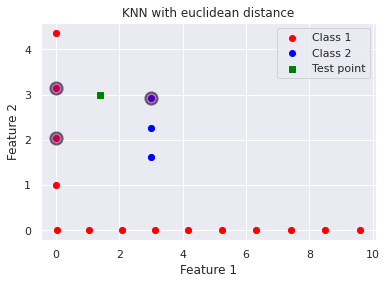

Test data point is classified as class 1
Class percentages among the nearest neighbors: {1: 66.66666666666666, 2: 33.33333333333333}
 


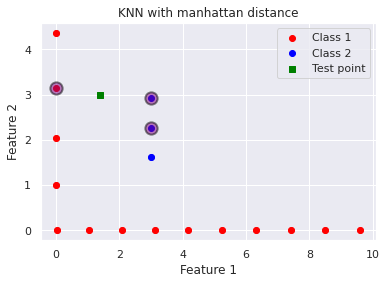

Test data point is classified as class 2
Class percentages among the nearest neighbors: {1: 33.33333333333333, 2: 66.66666666666666}


In [39]:
def plot_knn(test_point, distance_metric):
    # Create a KNN classifier with 3 nearest neighbors and the specified distance metric
    knn = KNN(k=3, distance_metric=distance_metric)
    
    # Split the dataframe into input features (X) and target variable (y)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    
    # Fit the classifier to the data
    knn.fit(X, y)

    # Calculate distances to all instances in the dataset
    distances = []
    for i in range(len(df)):
        dist = getattr(knn, f"{distance_metric}_distance")(test_point, df.iloc[i, :-1].values)
        distances.append((dist, df.iloc[i, -1]))
    
    # Select the K nearest neighbors
    neighbors = sorted(distances)[:knn.k]
    
    # Define colors for the two classes
    colors = {1: "red", 2: "blue"}

    # Plot data points for each class
    for label, color in colors.items():
        class_data = df[df["Class/Cluster"] == label]
        plt.scatter(class_data["Feature 1"], class_data["Feature 2"], color=color, label=f"Class {label}")

    # Plot the test data point
    plt.scatter(test_point[0], test_point[1], color="green", marker="s", label="Test point")

    # Plot the data points with different properties for nearest neighbors
    for index, row in df.iterrows():
        current_point = row.iloc[:-1].values
        
        # Skip the test data point
        if np.array_equal(current_point, test_point):
            continue

        # Calculate distance to the test data point
        dist = getattr(knn, f"{distance_metric}_distance")(test_point, current_point)
        
        # Check if the current point is a nearest neighbor
        is_neighbor = dist in sorted([neighbor[0] for neighbor in neighbors])

        # Set color and additional properties for nearest neighbors
        if is_neighbor:
            color = "purple"
            edgecolors = "black"
            linewidths = 2
            size = 150
            alpha = 0.5
        else:
            color = colors[row["Class/Cluster"]]
            edgecolors = None
            linewidths = 0
            size = 50
            alpha = 0.5

        plt.scatter(current_point[0], current_point[1], color=color, edgecolors=edgecolors,
                    linewidths=linewidths, s=size, alpha=alpha)

    # Add legend, labels, and title to the plot
    plt.legend()
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"KNN with {distance_metric} distance")
    
    # Show the plot
    plt.show()

    # Predict the class of the test data point
    prediction = knn.predict(np.array([test_point]))[0]
    print(f"Test data point is classified as class {prediction}")

    # Count the occurrences of each class among the nearest neighbors
    class_counts = {1: 0, 2: 0}
    for neighbor in neighbors:
        class_counts[neighbor[1]] += 1

    # Calculate the percentage of each class among the nearest neighbors
    class_percentages = {label: (count / len(neighbors)) * 100 for label, count in class_counts.items()}
    print("Class percentages among the nearest neighbors:", class_percentages)

# Define the test data point
test_point = np.array([1.4, 3])

# Plot the graphs for both euclidean and manhattan
plot_knn(test_point, 'euclidean')
print(" ")
plot_knn(test_point, 'manhattan')
